# **Assignment 4: Predict House Prices using Linear Regression**

Use a dataset (for example, the **Boston Housing dataset** or **California Housing dataset** from `sklearn.datasets`) to build models that predict house prices.


## Tasks

### 1. Data Exploration & Cleaning
- Load the dataset and explore its structure.
- Handle missing or inconsistent values if present.
- Visualize key relationships between features and the target (price).


### 2. Feature Engineering
- Create meaningful features if needed (e.g., combining or transforming existing features).
- Encode categorical variables appropriately.
- Avoid including features that directly leak the target information.


### 3. Modeling & Training
- Train a **linear regression model** using scikit-learn.
- Optionally, experiment with **other regression algorithms** (Ridge, Lasso, or Gradient Boosting).


### 4. Evaluation
- Evaluate models using appropriate regression metrics:  
  - Mean Squared Error (MSE)  
  - Root Mean Squared Error (RMSE)  
  - Mean Absolute Error (MAE)  
  - R² score
- Visualize predictions versus true values.
- Discuss which features are most important for predicting price.


### 5. Reflection
Answer the following =:
- How well does the linear regression model perform?  
- Are there features that dominate the predictions?  
- Did scaling or feature engineering improve performance?  
- How would you handle non-linear relationships?


✅ Deliverables:
- A **Colab notebook** with:
  - Cleaned and explored dataset
  - Model training code
  - Plots and metrics for evaluation
  - Reflections and answers in Markdown


In [ ]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Reading data

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(df.isnull().sum())
df.count()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,0
MedInc,20640
HouseAge,20640
AveRooms,20640
AveBedrms,20640
Population,20640
AveOccup,20640
Latitude,20640
Longitude,20640
MedHouseVal,20640


We can see that we have no missing values

# Visualising data

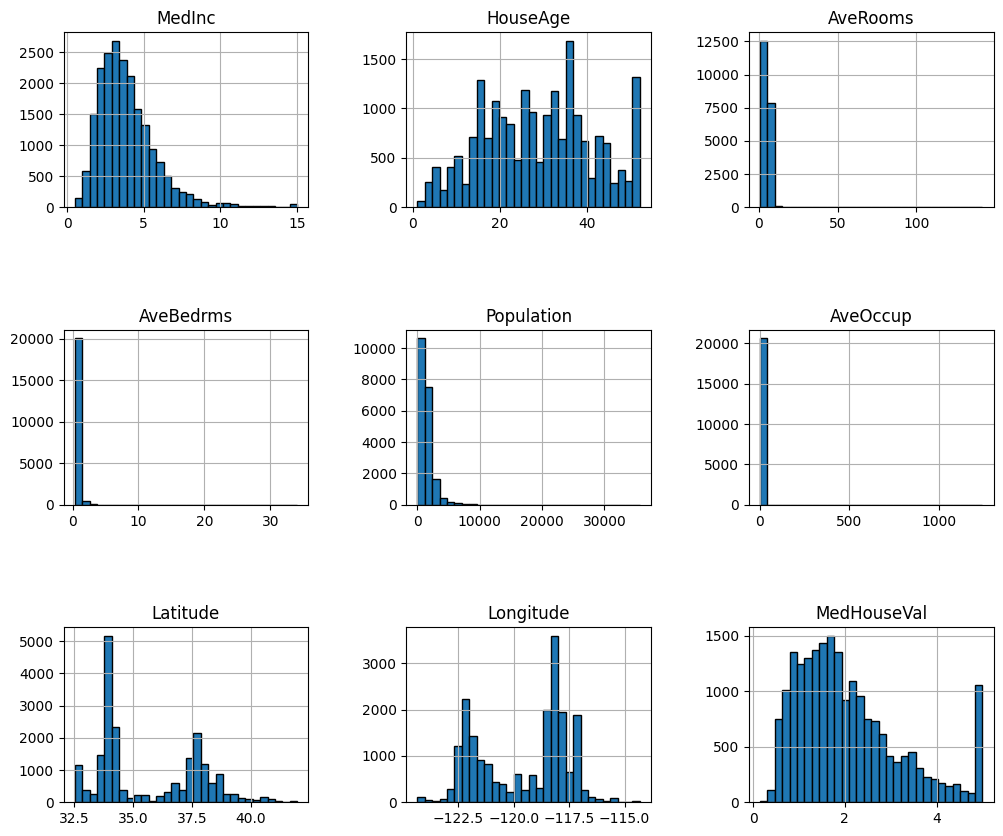

In [ ]:
import matplotlib.pyplot as plt

california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# Checking for outliers

<Axes: ylabel='AveBedrms'>

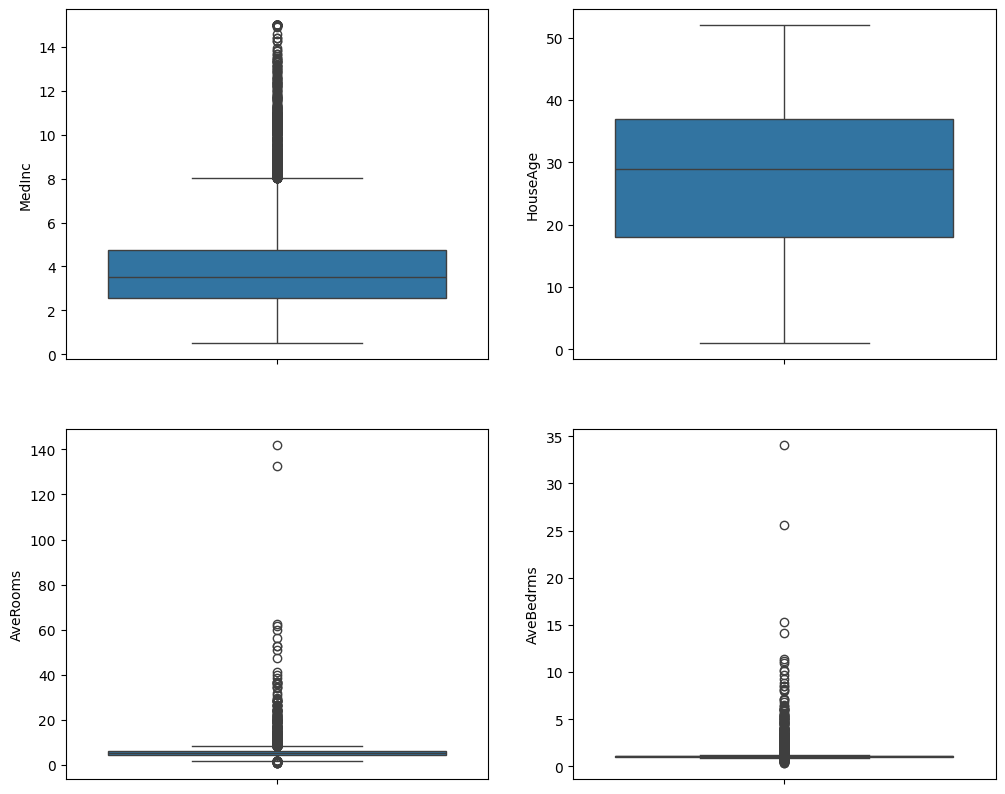

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
fig,axes = plt.subplots(2,2,figsize=(12,10))
sns.boxplot(df['MedInc'],ax=axes[0,0])
sns.boxplot(df['HouseAge'],ax=axes[0,1])
sns.boxplot(df['AveRooms'],ax=axes[1,0])
sns.boxplot(df['AveBedrms'],ax=axes[1,1])

We have no outliers for HouseAge, but we have some for AveRooms and AveBdrms and we`ll eliminate only a few of them(AveRooms>80 , AveBedrooms > 12). Concerning the MedInc, it appears to have some outliers, and we ll just let the algorithm play with them ( eliminate automatically from the IQR bounds)


Detected outliers in 'MedInc':
0         8.3252
1         8.3014
131      11.6017
134       8.2049
135       8.4010
          ...   
20426    10.0472
20427     8.6499
20428     8.7288
20436    12.5420
20503     8.2787
Name: MedInc, Length: 681, dtype: float64

 Upper bound and lower bound for 'MedInc'
8.013024999999999 -0.7063750000000004

Data after removing outliers:


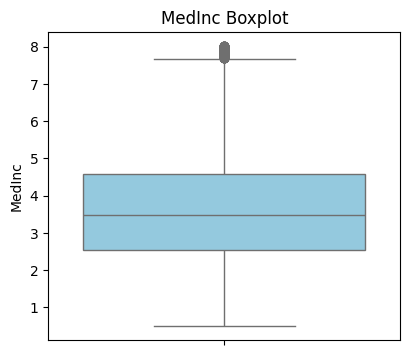


Detected outliers in 'HouseAge':
Series([], Name: HouseAge, dtype: float64)

 Upper bound and lower bound for 'HouseAge'
65.5 -10.5

Detected outliers in 'AveRooms':
73       1.714286
155      8.972868
511      8.928358
512      9.210227
514      9.122715
           ...   
20408    8.730038
20426    9.890756
20428    8.715842
20436    9.873315
20462    8.652174
Name: AveRooms, Length: 511, dtype: float64

 Upper bound and lower bound for 'AveRooms'
8.469878027106942 2.023219161170969

Detected outliers in 'AveBedrms':
41       1.248996
57       1.372951
59       0.754386
61       1.260870
62       1.557377
           ...   
20423    1.505155
20608    1.273171
20620    0.854167
20621    1.573248
20636    1.315789
Name: AveBedrms, Length: 1424, dtype: float64

 Upper bound and lower bound for 'AveBedrms'
1.2396965968190603 0.8659085155701288

Detected outliers in 'Population':
95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0

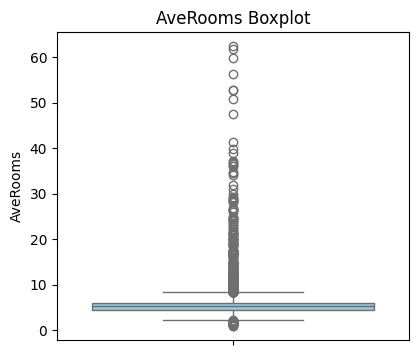


Data after removing outliers:


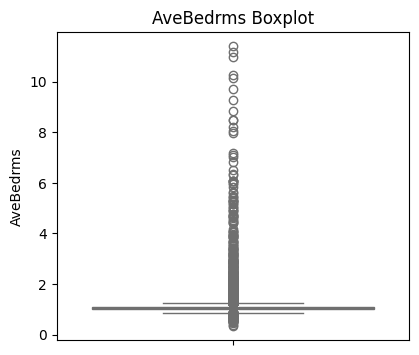


Data after removing outliers:


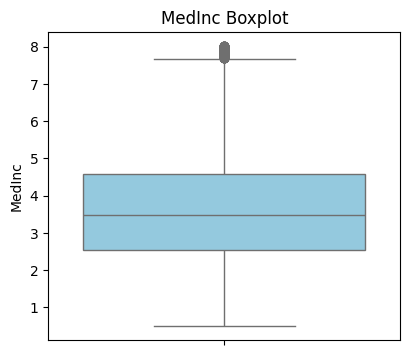

In [ ]:
numerical_columns = df.columns
df_clean = df
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nDetected outliers in '{column}':")
    print(outliers[column])
    print(f"\n Upper bound and lower bound for '{column}'")
    print(upper_bound, lower_bound)
    if column == "MedInc":
      df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]
      print("\nData after removing outliers:")
      plt.figure(figsize=(10,4))
      plt.subplot(1, 2, 1)
      sns.boxplot(y=df_clean[column], color="skyblue")
      plt.title("MedInc Boxplot")
      plt.show()

df_clean = df_clean[df_clean["AveRooms"] <80]
print("\nData after removing outliers:")
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean["AveRooms"], color="skyblue")
plt.title("AveRooms Boxplot")
plt.show()

df_clean = df_clean[df_clean["AveBedrms"] <=12]
print("\nData after removing outliers:")
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean["AveBedrms"], color="skyblue")
plt.title("AveBedrms Boxplot")
plt.show()

df_clean = df_clean[df_clean["MedInc"] <=12]
print("\nData after removing outliers:")
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
sns.boxplot(y=df_clean["MedInc"], color="skyblue")
plt.title("MedInc Boxplot")
plt.show()

In [ ]:
df_clean.count()

,0
MedInc,19955
HouseAge,19955
AveRooms,19955
AveBedrms,19955
Population,19955
AveOccup,19955
Latitude,19955
Longitude,19955
MedHouseVal,19955


We had 20640, now we have 19925, we lost 715 which is not so much but not so little, let`s see if the correlations are now better

# Relationships/correlations

In [ ]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame

<Axes: xlabel='HouseAge', ylabel='MedHouseVal'>

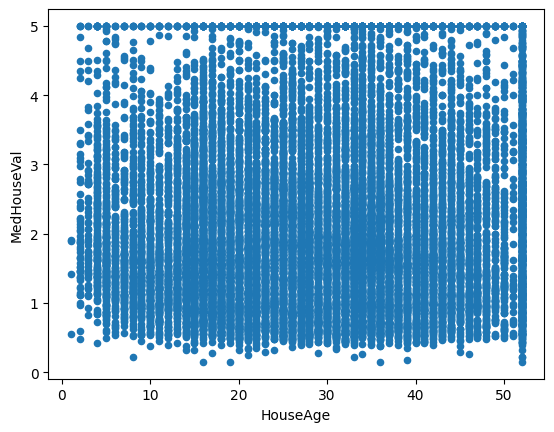

In [ ]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='HouseAge', y='MedHouseVal')

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

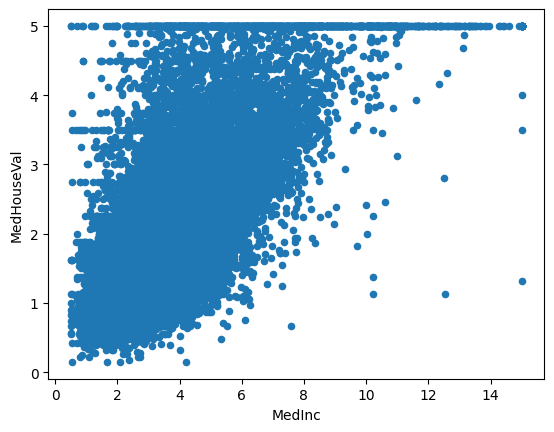

In [ ]:
df.plot(kind='scatter', x='MedInc', y='MedHouseVal')

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

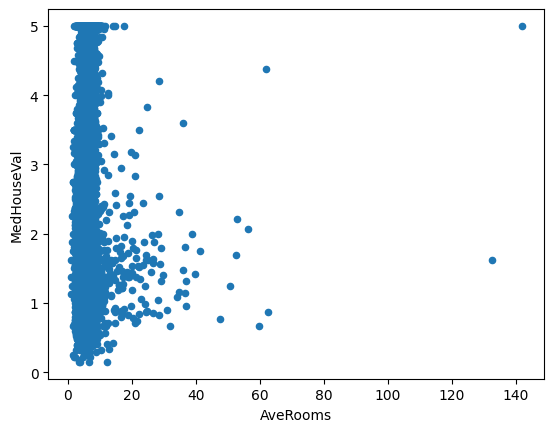

In [ ]:
df.plot(kind='scatter', x='AveRooms', y='MedHouseVal')

let`s make a correlation matrix for a better view

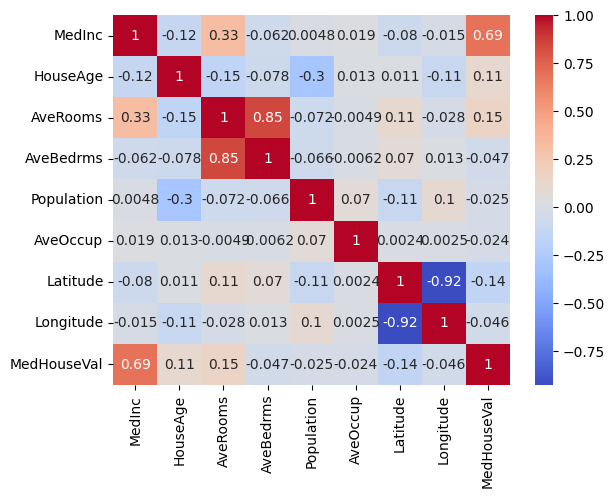

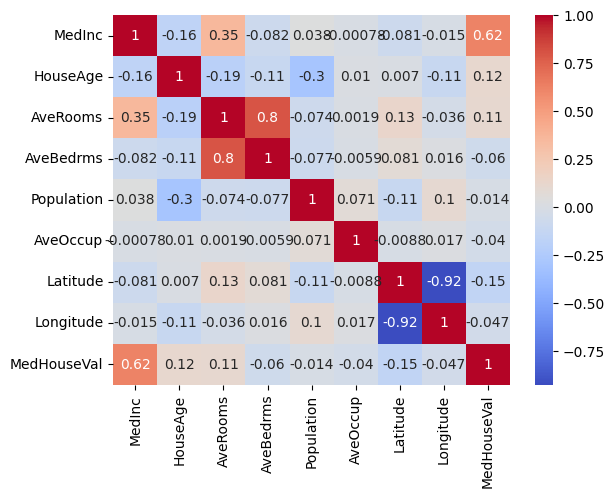

In [ ]:
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()
corr_matrix = df_clean.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Looks like the correlations are worse without outliers, so we`ll no longer use the cleaned dataframe, we will keep the outliers

Let`s try to see if the locations of a House is highly correlated

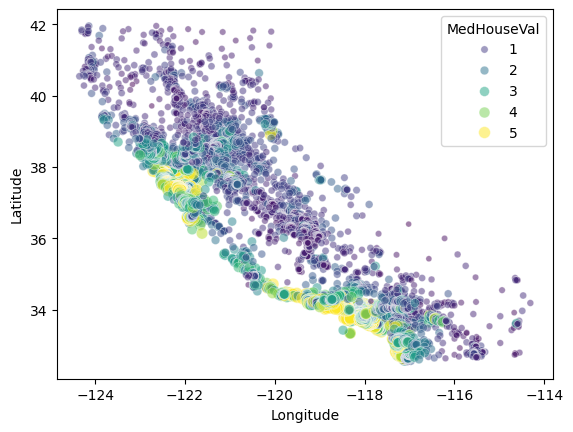

In [ ]:
import seaborn as sns

sns.scatterplot(
    data=california_housing.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal")

Looks like we have a mini map of California, with some zones where prices are higher

# Feature engineering

In [ ]:
df["PopulationPerBedroom"] = df["Population"] / df["AveBedrms"]
df["PopulationPerHouse"] = df["Population"] / df["AveRooms"]
df["OccupPerRooms"] = df["AveOccup"] / df["AveRooms"]
df["OccupPerBedroom"] = df["AveOccup"] / df["AveBedrms"]
df["BedroomsPerRoom"] = df["AveBedrms"] / df["AveRooms"]
print(df["PopulationPerBedroom"].corr(df["MedHouseVal"]))
print(df["PopulationPerHouse"].corr(df["MedHouseVal"]))
print(df["OccupPerRooms"].corr(df["MedHouseVal"]))
print(df["OccupPerBedroom"].corr(df["MedHouseVal"]))
print(df["BedroomsPerRoom"].corr(df["MedHouseVal"]))

-0.016602517155542337
-0.08931263058189191
-0.033556972281164894
-0.019257925113810602
-0.2556241671955806


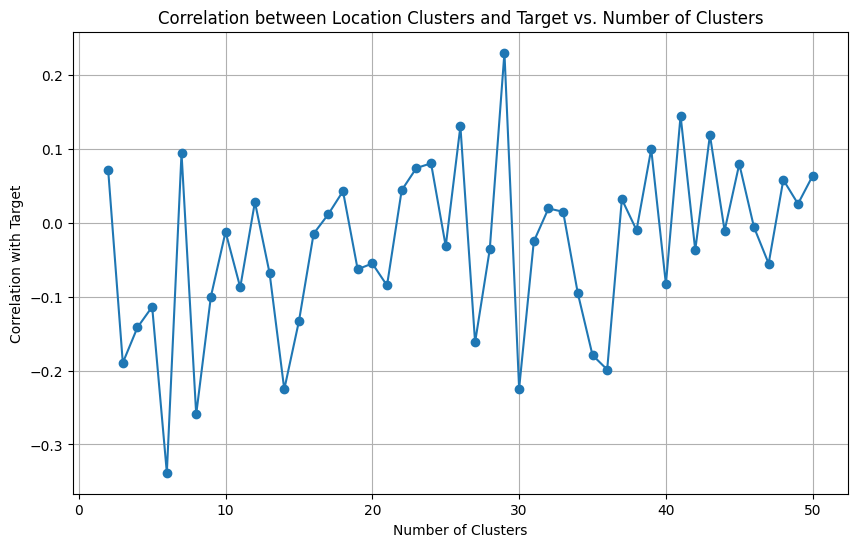

Number of clusters with the strongest correlation: 6
Strongest correlation coefficient: -0.3384


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select Latitude and Longitude for clustering
location_data = df[['Latitude', 'Longitude']]

cluster_range = range(2, 51) # try from 2 to 50 clusters

# List to store correlation coefficients
correlations = []

# Calculate correlation for each number of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    df['Location_Cluster'] = kmeans.fit_predict(location_data)

    # Calculate the correlation between the new cluster feature and the target
    correlation = df['Location_Cluster'].corr(df['MedHouseVal'])
    correlations.append(correlation)

# Plot the correlation vs. the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, correlations, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Correlation with Target')
plt.title('Correlation between Location Clusters and Target vs. Number of Clusters')
plt.grid(True)
plt.show()

# Find the number of clusters with the strongest correlation (absolute value)
abs_correlations = [abs(c) for c in correlations]
best_n_clusters_index = abs_correlations.index(max(abs_correlations))
best_n_clusters = cluster_range[best_n_clusters_index]
best_correlation = correlations[best_n_clusters_index]

print(f"Number of clusters with the strongest correlation: {best_n_clusters}")
print(f"Strongest correlation coefficient: {best_correlation:.4f}")

In [ ]:
from sklearn.cluster import KMeans

# Select latitude and longitude for clustering
location_data = df[['Latitude', 'Longitude']]

# Apply KMeans clustering
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
df['Location_Cluster'] = kmeans.fit_predict(location_data)

# Display the first few rows with the new feature
display(df.head())
print(df["Location_Cluster"].corr(df["MedHouseVal"]))


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PopulationPerBedroom,PopulationPerHouse,OccupPerRooms,OccupPerBedroom,BedroomsPerRoom,Location_Cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,314.511628,46.104545,0.365909,2.496124,0.146591,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2470.468354,384.890548,0.338217,2.170886,0.155797,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,462.063158,59.844581,0.338105,2.610526,0.129516,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,520.008511,95.919937,0.437991,2.374468,0.184458,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,522.625000,89.941610,0.347265,2.017857,0.172096,1


-0.3383820326669651


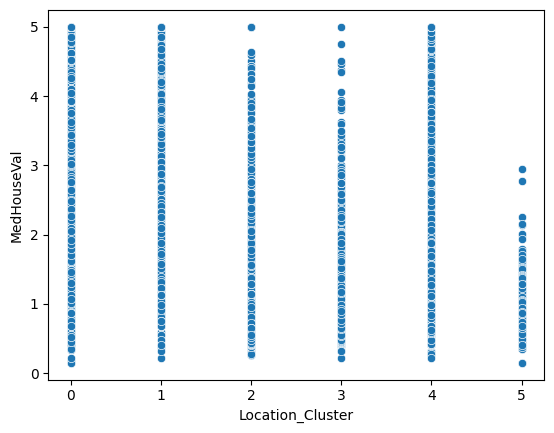

In [ ]:
sns.scatterplot(x="Location_Cluster",y="MedHouseVal", data=df)
plt.show()

Let`s try to create a variable for ocean proximity

In [ ]:
# Create 'Ocean_proximity' feature based on Latitude and Longitude
ocean_proximity = []
for lat, lon in zip(df['Latitude'], df['Longitude']):
    if (lat > 34.0) and (lon < -118.0) and (lon > -120.0): # Near LA coast
        ocean_proximity.append('<1H OCEAN')
    elif (lat > 36.0) and (lon < -121.0): # Near SF coast
        ocean_proximity.append('NEAR BAY')
    elif lat > 38.0: # Northern California coast
        ocean_proximity.append('NEAR OCEAN')
    elif lon < -120.0: # Central coast
        ocean_proximity.append('NEAR OCEAN')
    else:
        ocean_proximity.append('INLAND')

df['Ocean_proximity'] = ocean_proximity

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,PopulationPerBedroom,PopulationPerHouse,OccupPerRooms,OccupPerBedroom,BedroomsPerRoom,Location_Cluster,Ocean_proximity
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,314.511628,46.104545,0.365909,2.496124,0.146591,1,NEAR BAY
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,2470.468354,384.890548,0.338217,2.170886,0.155797,1,NEAR BAY
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,462.063158,59.844581,0.338105,2.610526,0.129516,1,NEAR BAY
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,520.008511,95.919937,0.437991,2.374468,0.184458,1,NEAR BAY
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,522.625000,89.941610,0.347265,2.017857,0.172096,1,NEAR BAY


# Scaling latitude and longitude


In [ ]:
df['Latitude_Scaled'] = (df['Latitude'] - df['Latitude'].min()) / (df['Latitude'].max() - df['Latitude'].min())
df['Latitude_Scaled']
df['Longitude_Scaled'] = (df['Longitude'] - df['Longitude'].min()) / (df['Longitude'].max() - df['Longitude'].min())
df['Longitude_Scaled']

,Longitude_Scaled
0,0.211155
1,0.212151
2,0.210159
3,0.209163
4,0.209163
...,...
20635,0.324701
20636,0.312749
20637,0.311753
20638,0.301793


# Models

## Model with Ocean_proximity

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X = df[['MedInc', 'Ocean_proximity', 'HouseAge', "BedroomsPerRoom"]]
y = df['MedHouseVal']

# We also need to apply one hot encoding for ocean proximity
X = pd.get_dummies(X, columns=['Ocean_proximity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_ocean_prox = LinearRegression()
model_ocean_prox.fit(X_train, y_train)

print(f"Intercept: {model_ocean_prox.intercept_}")
print(f"Coefficients: {model_ocean_prox.coef_}")

y_pred_ocean_prox = model_ocean_prox.predict(X_test)


Intercept: -1.476347694421642
Coefficients: [ 0.52459793  0.01506738  5.00587656  0.08592327 -0.05557604  0.06038654
 -0.09073377]


## Model with Location_Cluster

We can see that the highest correlated feature is MedInc
followed by Location_Cluster, BedroomsPerRoom

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Define features (X) and target (y)
X = df[['MedInc', 'Location_Cluster', 'HouseAge', "BedroomsPerRoom"]]
y = df['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit sklearn linear regression model
model_three_features = LinearRegression()
model_three_features.fit(X_train, y_train)

# Print the model coefficients
print(f"Intercept: {model_three_features.intercept_}")
print(f"Coefficients: {model_three_features.coef_}")

# Make predictions on the test set
y_pred_three_features = model_three_features.predict(X_test)

# Plotting (visualizing against each feature individually)
# plt.figure(figsize=(12, 10))
plt.figure(figsize=(12, 10)) # Adjusted figure size for 2x2 grid

plt.subplot(2, 2, 1) # Changed to 2x2 grid, first plot
plt.scatter(X_test['MedInc'], y_test, label="True values")
plt.scatter(X_test['MedInc'], y_pred_three_features, color='red', label="Predictions")
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs MedInc')
plt.legend()

plt.subplot(2, 2, 2) # Added fourth plot for HouseAge
plt.scatter(X_test['HouseAge'], y_test, label="True values")
plt.scatter(X_test['HouseAge'], y_pred_three_features, color='red', label="Predictions")
plt.xlabel('HouseAge')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs HouseAge')
plt.legend()

plt.subplot(2, 2, 3) # Changed to 2x2 grid, third plot
plt.scatter(X_test['BedroomsPerRoom'], y_test, label="True values")
plt.scatter(X_test['BedroomsPerRoom'], y_pred_three_features, color='red', label="Predictions")
plt.xlabel('BedroomsPerRoom')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs BedroomsPerRoom')
plt.legend()

plt.subplot(2, 2, 4) # Changed to 2x2 grid, second plot
plt.scatter(X_test['Location_Cluster'], y_test, label="True values")
plt.scatter(X_test['Location_Cluster'], y_pred_three_features, color='red', label="Predictions")
plt.xlabel('Location_Cluster')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs Location_Cluster')
plt.legend()

plt.tight_layout()
plt.show()

## Model without new engineeeeered features

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Define features (X) and target (y)
X = df[['MedInc', 'HouseAge', 'BedroomsPerRoom']]
y = df['MedHouseVal']

# Split data into training and testing sets
X_nof_train, X_nof_test, y_nof_train, y_nof_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit sklearn linear regression model
model_nof_three_features = LinearRegression()
model_nof_three_features.fit(X_nof_train, y_nof_train)

# Print the model coefficients
print(f"Intercept: {model_nof_three_features.intercept_}")
print(f"Coefficients: {model_nof_three_features.coef_}")

# Make predictions on the test set
y_nof_pred_three_features = model_nof_three_features.predict(X_nof_test)

# Plotting (visualizing against each feature individually)
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X_nof_test['MedInc'], y_nof_test, label="True values")
plt.scatter(X_nof_test['MedInc'], y_nof_pred_three_features, color='red', label="Predictions")
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs MedInc')
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(X_nof_test['HouseAge'], y_nof_test, label="True values")
plt.scatter(X_nof_test['HouseAge'], y_nof_pred_three_features, color='red', label="Predictions")
plt.xlabel('HouseAge')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs HouseAge')
plt.legend()

plt.subplot(2, 2, 3)
plt.scatter(X_nof_test['BedroomsPerRoom'], y_nof_test, label="True values")
plt.scatter(X_nof_test['BedroomsPerRoom'], y_pred_three_features, color='red', label="Predictions")
plt.xlabel('BedroomsPerRoom')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs BedroomsPerRoom')
plt.legend()


plt.tight_layout()
plt.show()

## Single feature model - MedInc


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Define features (X_medinc) and target (y)
X_medinc = df[['MedInc']] # Use double brackets to keep it as a DataFrame
y = df['MedHouseVal']

# Split data into training and testing sets (using the same split as the three-feature model)
X_train_medinc, X_test_medinc, y_train_single, y_test_single = train_test_split(X_medinc, y, test_size=0.2, random_state=42)


# Create and fit sklearn linear regression model
model_medinc = LinearRegression()
model_medinc.fit(X_train_medinc, y_train_single)

# Print the model coefficients
print(f"Intercept: {model_medinc.intercept_}")
print(f"Coefficient: {model_medinc.coef_}")

# Make predictions on the test set
y_pred_medinc = model_medinc.predict(X_test_medinc)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_test_medinc, y_test_single, label="True values")
plt.scatter(X_test_medinc, y_pred_medinc, color='red', label="Predictions")
# Add the regression line
plt.plot(X_test_medinc, y_pred_medinc, color='green', label='Regression Line')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('MedHouseVal vs MedInc (Single Feature Model)')
plt.legend()
plt.show()

# Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



# Error values for the model without Location_Cluster ( no feature engineering)
mse_nof_three_features = mean_squared_error(y_nof_test, y_nof_pred_three_features)
rmse_nof_three_features = np.sqrt(mse_nof_three_features)
mae_nof_three_features = mean_absolute_error(y_nof_test, y_nof_pred_three_features)
r2_nof_three_features = r2_score(y_nof_test, y_nof_pred_three_features)

print("\n--- Model without Location_Cluster (No Feature Engineering) Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_nof_three_features:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_nof_three_features:.4f}")
print(f"Mean Absolute Error (MAE): {mae_nof_three_features:.4f}")
print(f"R-squared (R²): {r2_nof_three_features:.4f}")

# Error values for the three features model
mse_three_features = mean_squared_error(y_test, y_pred_three_features)
rmse_three_features = np.sqrt(mse_three_features)
mae_three_features = mean_absolute_error(y_test, y_pred_three_features)
r2_three_features = r2_score(y_test, y_pred_three_features)

# Error values for the Ocean_proximity model
mse_ocean_prox = mean_squared_error(y_test, y_pred_ocean_prox)
rmse_ocean_prox = np.sqrt(mse_ocean_prox)
mae_ocean_prox = mean_absolute_error(y_test, y_pred_ocean_prox)
r2_ocean_prox = r2_score(y_test, y_pred_ocean_prox)

print("\n--- Model with Ocean proximity")
print(f"Mean Squared Error (MSE): {mse_ocean_prox:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_ocean_prox:.4f}")
print(f"Mean Absolute Error (MAE): {mae_ocean_prox:.4f}")
print(f"R-squared (R²): {r2_ocean_prox:.4f}")


print("\n--- Same model + new feature Location_Cluster")
print(f"Mean Squared Error (MSE): {mse_three_features:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_three_features:.4f}")
print(f"Mean Absolute Error (MAE): {mae_three_features:.4f}")
print(f"R-squared (R²): {r2_three_features:.4f}")

# Error values for the single feature model
mse_medinc = mean_squared_error(y_test, y_pred_medinc)
rmse_medinc = np.sqrt(mse_medinc)
mae_medinc = mean_absolute_error(y_test, y_pred_medinc)
r2_medinc = r2_score(y_test, y_pred_medinc)

print("\n--- Single Feature Model (MedInc) Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_medinc:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_medinc:.4f}")
print(f"Mean Absolute Error (MAE): {mae_medinc:.4f}")
print(f"R-squared (R²): {r2_medinc:.4f}")



--- Model without Location_Cluster (No Feature Engineering) Evaluation ---
Mean Squared Error (MSE): 0.6148
Root Mean Squared Error (RMSE): 0.7841
Mean Absolute Error (MAE): 0.5701
R-squared (R²): 0.5308

--- Model with Ocean proximity
Mean Squared Error (MSE): 0.6121
Root Mean Squared Error (RMSE): 0.7824
Mean Absolute Error (MAE): 0.5673
R-squared (R²): 0.5329

--- Same model + new feature Location_Cluster
Mean Squared Error (MSE): 0.5988
Root Mean Squared Error (RMSE): 0.7738
Mean Absolute Error (MAE): 0.5644
R-squared (R²): 0.5430

--- Single Feature Model (MedInc) Evaluation ---
Mean Squared Error (MSE): 0.7091
Root Mean Squared Error (RMSE): 0.8421
Mean Absolute Error (MAE): 0.6299
R-squared (R²): 0.4589


We can notice that the error values are lower for the model with three features than the one that only uses MedInc as a feature

# Modeling with Scaled Features

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define features (X) and target (y)
X = df[['MedInc', 'Location_Cluster', 'BedroomsPerRoom','HouseAge']]
y = df['MedHouseVal']

# Split data into training and testing sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit sklearn linear regression model on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Print the model coefficients (these will be different due to scaling)
print(f"Intercept (Scaled Model): {model_scaled.intercept_}")
print(f"Coefficients (Scaled Model): {model_scaled.coef_}")

# Make predictions on the scaled test set
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Evaluate the scaled model
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
mae_scaled = mean_absolute_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("\n--- Scaled Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse_scaled:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_scaled:.4f}")
print(f"Mean Absolute Error (MAE): {mae_scaled:.4f}")
print(f"R-squared (R²): {r2_scaled:.4f}")

Intercept (Scaled Model): 2.071946937378876
Coefficients (Scaled Model): [ 0.94669006 -0.13569291  0.25353963  0.169939  ]

--- Scaled Model Evaluation ---
Mean Squared Error (MSE): 0.5988
Root Mean Squared Error (RMSE): 0.7738
Mean Absolute Error (MAE): 0.5644
R-squared (R²): 0.5430


In [ ]:
print(f"Mean Squared Error (MSE)")
if mse_scaled < mse_three_features:
  print("Scaled has a lower error")
else:
  print("Scaled has a higher error")

print(f"\nRoot Mean Squared Error (RMSE)")
if rmse_scaled < rmse_three_features:
  print("Scaled has a lower error")
else:
  print("Scaled has a higher error")

print(f"\nMean Absolute Error (MAE)")
if mae_scaled < mae_three_features:
  print("Scaled has a lower error")
else:
  print("Scaled has a higher error")

print(f"\nR-squared (R²)")
if r2_scaled < r2_three_features:
  print("Scaled has a lower error")
else:
  print("Scaled has a higher error")


Mean Squared Error (MSE)
Scaled has a higher error

Root Mean Squared Error (RMSE)
Scaled has a higher error

Mean Absolute Error (MAE)
Scaled has a higher error

R-squared (R²)
Scaled has a higher error


# Reflection

I noticed the followings:


1.   For this kind of task ( predicting a price), the linear regression performs pretty well
2.   The feature MedInc( MediumIncome) dominates the predictions, which is reasonable considering that people that earn more can afford an expensive housing
3.   Feature enineering improved the performance ( the new feature Location_Cluster) because it has a high correlation with the target
4.   For the non-linear relationships (ex. location latitude-longitude and Median House Value) where we can see that isn`t linear just by observing the scatterplot from above, we can create clusters in order to use them with Linear Regression, as the model treats each cluster as a separate group.
5.   For this particular case, scaling didn`t prove itself useful, because the errors are almost the same, but still they decrease the errors

